# Neural Network Model Project 1
### Overview:
A dataset is given "Customer_churn.csv". It has rows and a target variable which determines whether a customer has exit a bank or not. We will use the dataset to perform an end to end deep learning to understand neural network model

In [18]:
# load libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [19]:
pwd

'C:\\Users\\DOREEN DOMPREH'

In [20]:
# load dataset using pandas
df = pd.read_csv('Downloads/python-for-deep-learning-and-ai/data/Customer_Churn_Modelling.csv', header=0)

In [21]:
df.head()

RowNumber  CustomerId   Surname  CreditScore Geography  Gender  Age  \
0          1    15634602  Hargrave          619    France  Female   42   
1          2    15647311      Hill          608     Spain  Female   41   
2          3    15619304      Onio          502    France  Female   42   
3          4    15701354      Boni          699    France  Female   39   
4          5    15737888  Mitchell          850     Spain  Female   43   

   Tenure    Balance  NumOfProducts  HasCrCard  IsActiveMember  \
0       2       0.00              1          1               1   
1       1   83807.86              1          0               1   
2       8  159660.80              3          1               0   
3       1       0.00              2          0               0   
4       2  125510.82              1          1               1   

   EstimatedSalary  Exited  
0        101348.88       1  
1        112542.58       0  
2        113931.57       1  
3         93826.63       0  
4         79084.10       0

In [22]:
x = df.iloc[:,3:-1]
# x = pd.get_dummies(x, drop_first=True).astype(int)
x

CreditScore Geography  Gender  Age  Tenure    Balance  NumOfProducts  \
0             619    France  Female   42       2       0.00              1   
1             608     Spain  Female   41       1   83807.86              1   
2             502    France  Female   42       8  159660.80              3   
3             699    France  Female   39       1       0.00              2   
4             850     Spain  Female   43       2  125510.82              1   
...           ...       ...     ...  ...     ...        ...            ...   
9995          771    France    Male   39       5       0.00              2   
9996          516    France    Male   35      10   57369.61              1   
9997          709    France  Female   36       7       0.00              1   
9998          772   Germany    Male   42       3   75075.31              2   
9999          792    France  Female   28       4  130142.79              1   

      HasCrCard  IsActiveMember  EstimatedSalary  
0             1               1        101348.88  
1             0               1        112542.58  
2             1               0        113931.57  
3             0               0         93826.63  
4             1               1         79084.10  
...         ...             ...              ...  
9995          1               0         96270.64  
9996          1               1        101699.77  
9997          0               1         42085.58  
9998          1               0         92888.52  
9999          1               0         38190.78  

[10000 rows x 10 columns]

In [23]:
y = df['Exited']
y

0       1
1       0
2       1
3       0
4       0
       ..
9995    0
9996    0
9997    1
9998    1
9999    0
Name: Exited, Length: 10000, dtype: int64

<Axes: xlabel='Exited', ylabel='count'>

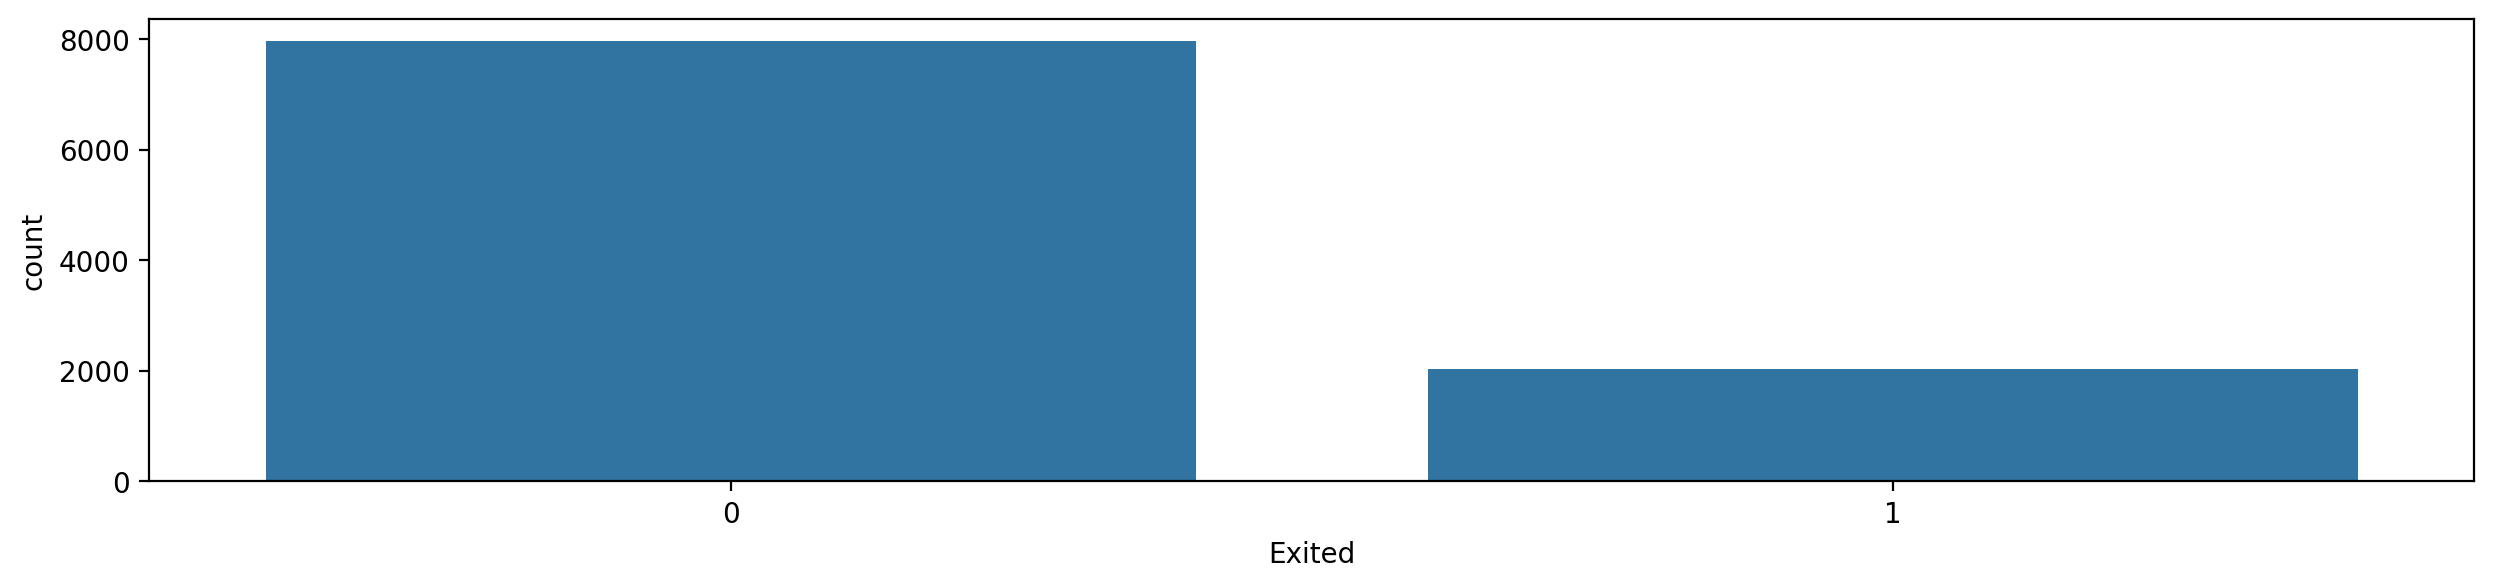

In [30]:
# total number of output per target variable
sns.countplot(x=y)

In [28]:
'''
Observation: 
1. About 8000 customers have not exited the bank

2. About 2000 customers have exited the bank
'''

'\nObservation: \n1. About 8000 customers have not exited the bank\n\n2. About 2000 customers have exited the bank\n'

# Data Visualization

In [32]:
x.columns

Index(['CreditScore', 'Geography', 'Gender', 'Age', 'Tenure', 'Balance',
       'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary'],
      dtype='object')

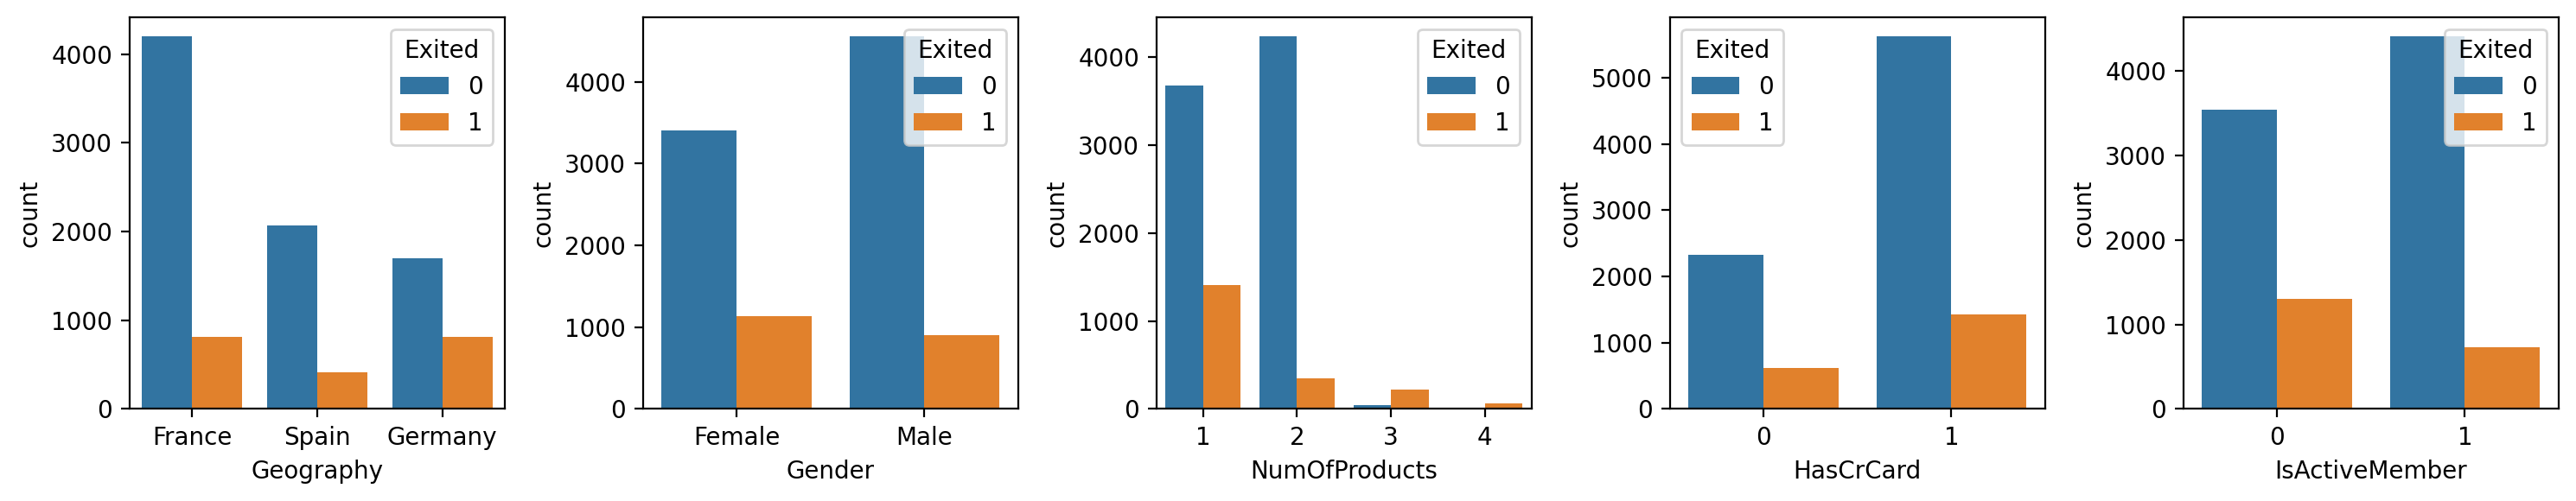

In [33]:
# quality plot on categorical variable against the target variable
plt.rcParams['figure.figsize'] = (15, 3)
plt.rcParams['figure.dpi'] = 200

fig,ax = plt.subplots(1, 5)
sns.countplot(x='Geography', data=x, ax=ax[0], hue=y)
sns.countplot(x='Gender', data=x, ax=ax[1], hue=y)
sns.countplot(x='NumOfProducts', data=x, ax=ax[2], hue=y)
sns.countplot(x='HasCrCard', data=x, ax=ax[3], hue=y)
sns.countplot(x='IsActiveMember', data=x, ax=ax[4], hue=y)

plt.tight_layout()

# Observation
1. There is less chance customers will exit in France
2. There is high chance customers will exit in Germany
3. There is high chance females will exit 
4. There is less chance men will exit
5. There is less chance customers with 1 or 2 product will exit
6. Customers with more than 2 product is very likely to exit
7. Customers with credit cards is less likely to exit
8. Active members are less likely to exit

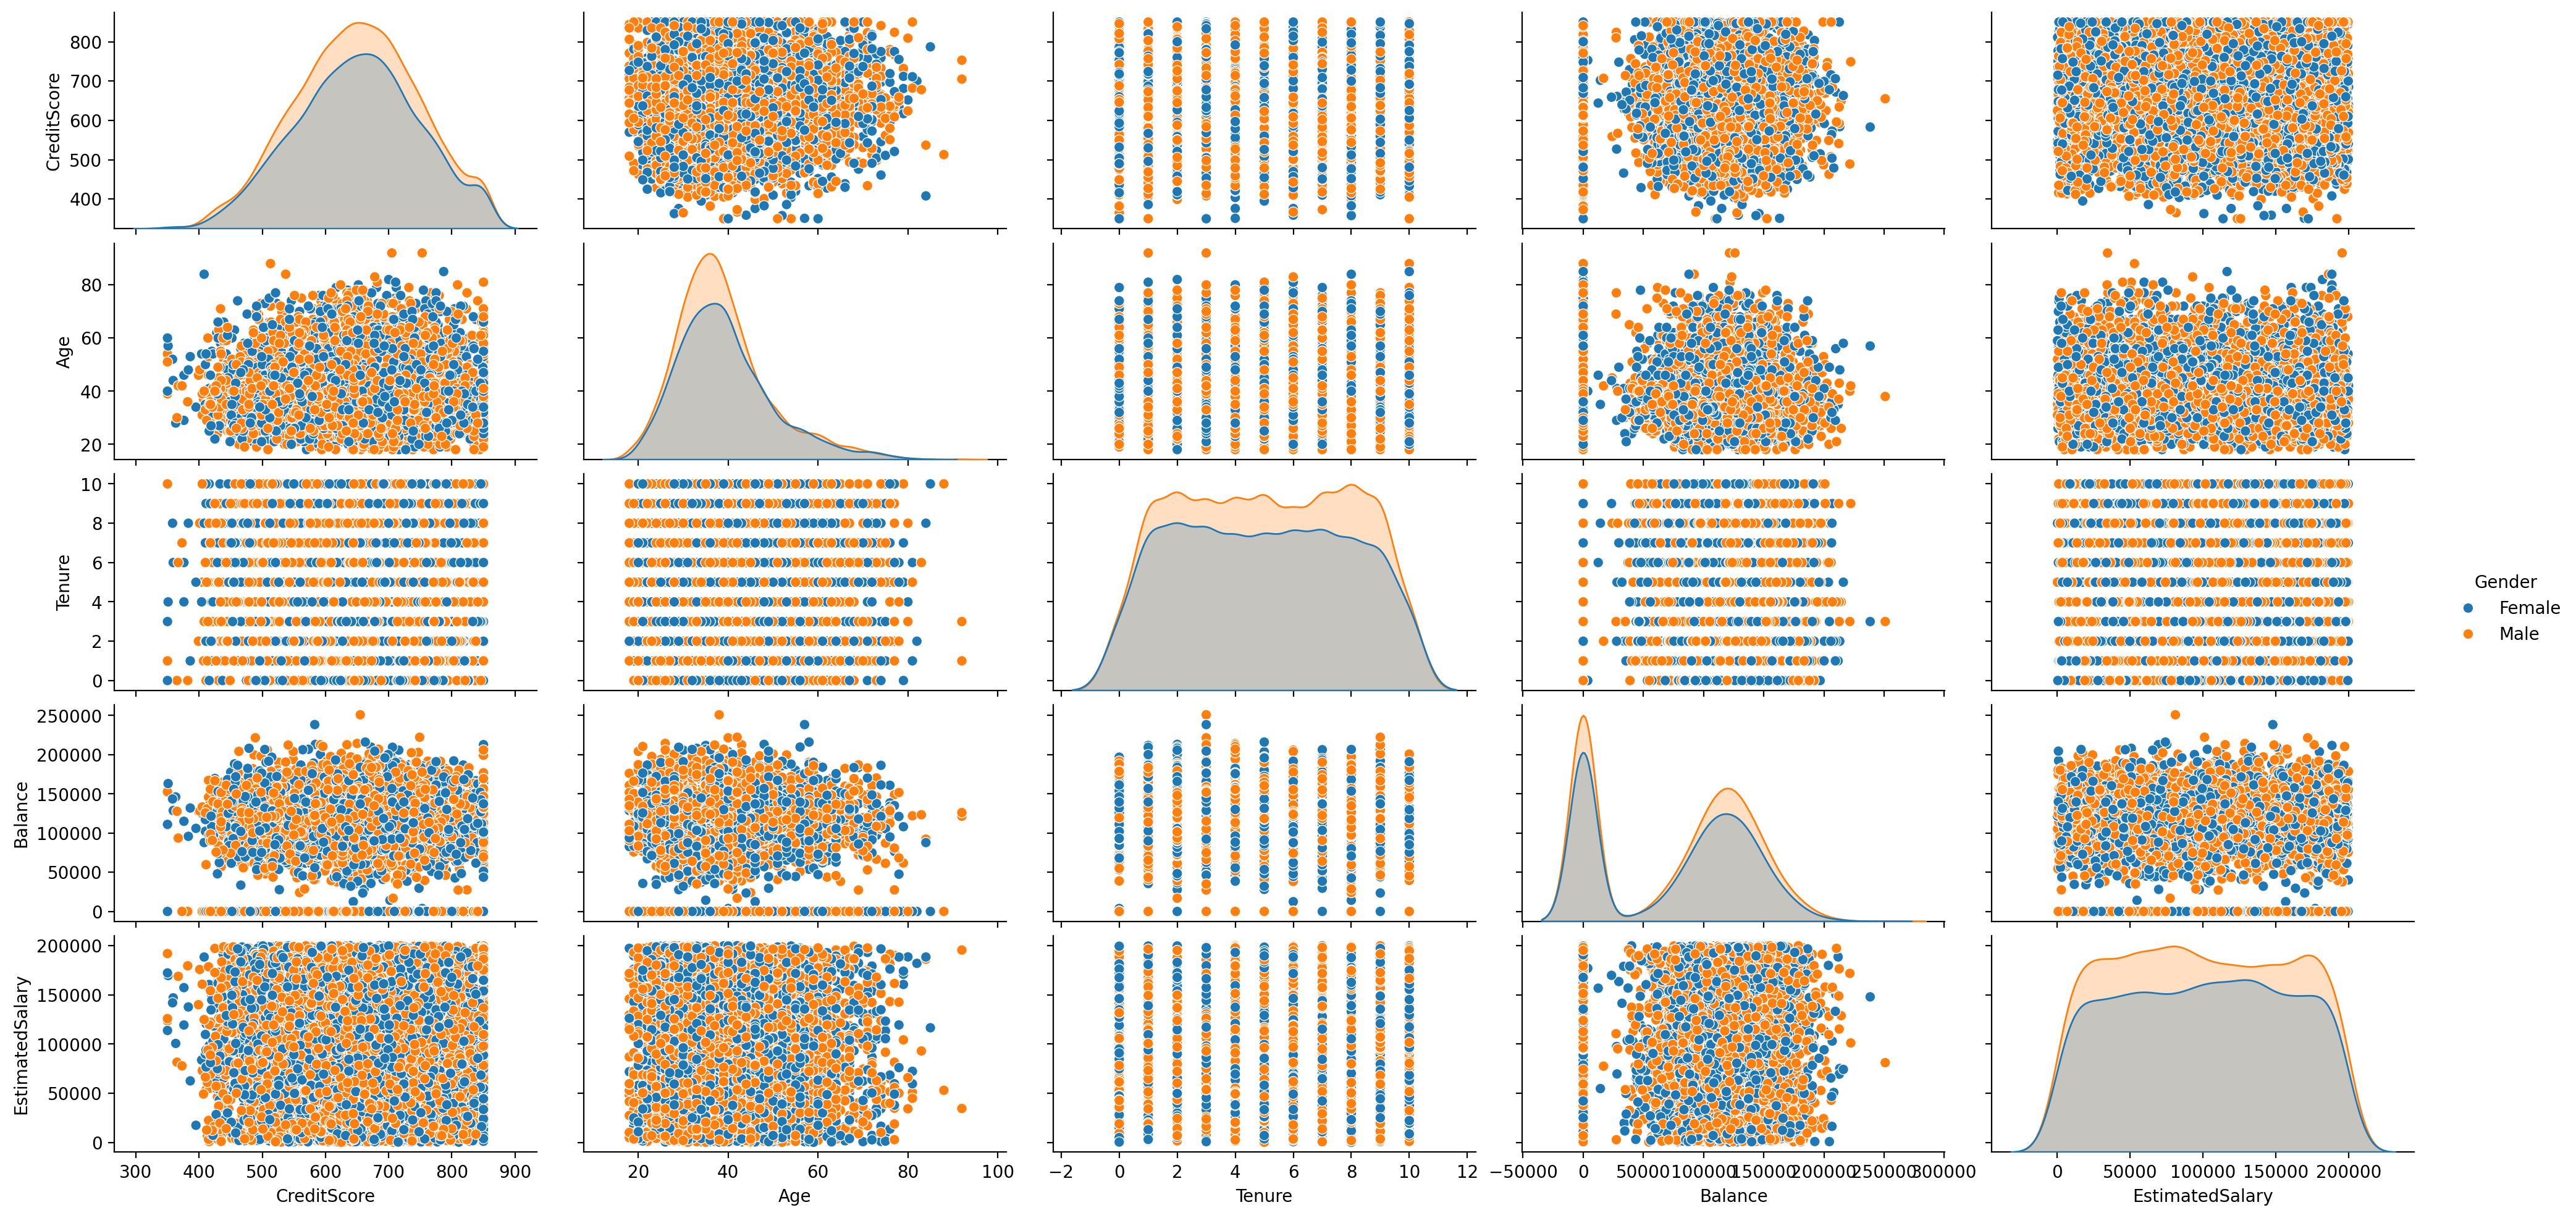

In [34]:
# pairplot on numerical variable against any parameter.
sns.pairplot(df, vars=['CreditScore', 'Age', 'Tenure', 'Balance', 'EstimatedSalary'], height=2, aspect=2, hue='Gender')

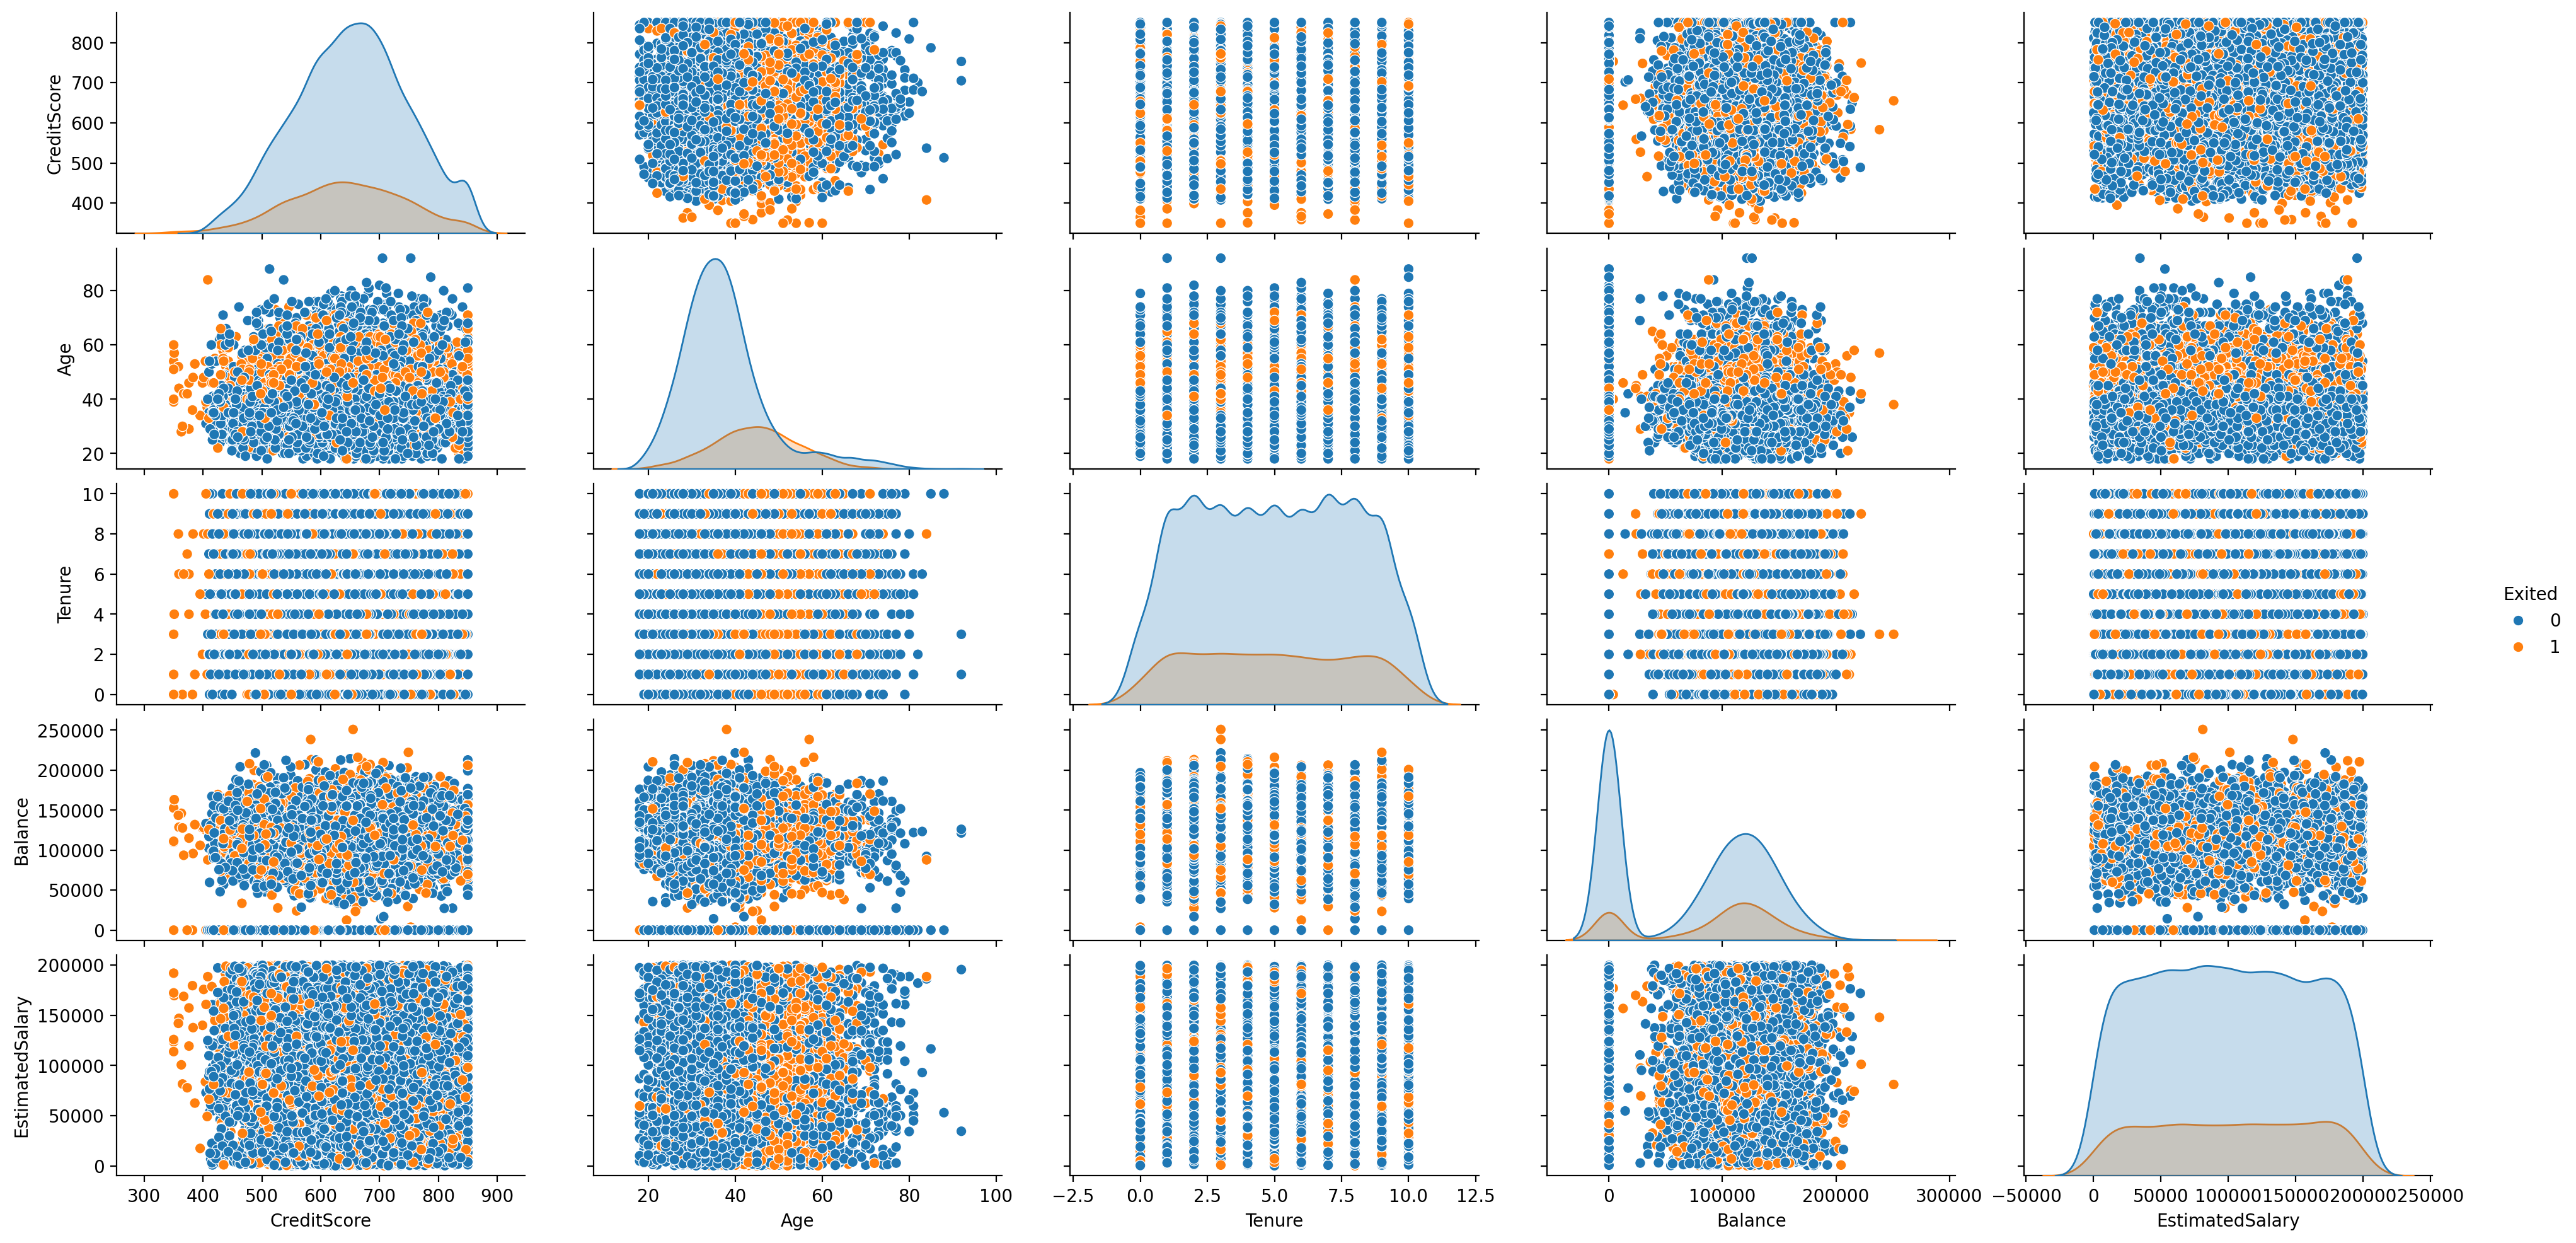

In [35]:
sns.pairplot(df, vars=['CreditScore', 'Age', 'Tenure', 'Balance', 'EstimatedSalary'], height=2, aspect=2, hue='Exited')

# Observation
1. Customers with estimated salary less than 5000 is likely to exit
2. Customers with 0 balance is likely to stay 
3. Customers who have been with the bank for more than years is highly likely not to exit
4. Customers between ages 40-60 is likely to exit
5. Customers with less creditscore (300-400) is likely to exit

# Train_test_split

In [37]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [40]:
x_encoded = pd.get_dummies(x, drop_first=True).astype(int)

In [43]:
x_train, x_test, y_train, y_test = train_test_split(x_encoded, y, test_size=0.2, random_state=42, stratify=y)

In [44]:
# confirm the training dataset and size(training dataset)
x_train

CreditScore  Age  Tenure  Balance  NumOfProducts  HasCrCard  \
2151          753   57       7        0              1          1   
8392          739   32       3   102128              1          1   
5006          755   37       0   113865              2          1   
4117          561   37       5        0              2          1   
7182          692   49       6   110540              2          0   
...           ...  ...     ...      ...            ...        ...   
4555          688   35       6        0              1          1   
4644          712   74       5        0              2          0   
8942          667   37       9    71786              2          1   
2935          687   35       8   100988              2          1   
6206          802   51       7        0              1          0   

      IsActiveMember  EstimatedSalary  Geography_Germany  Geography_Spain  \
2151               0           159475                  0                0   
8392               0            63981                  1                0   
5006               1           117396                  1                0   
4117               0            83093                  0                0   
7182               1           107472                  1                0   
...              ...              ...                ...              ...   
4555               0            25488                  0                1   
4644               0           151425                  0                1   
8942               1            67734                  0                0   
2935               0            22247                  0                1   
6206               1            40855                  0                1   

      Gender_Male  
2151            1  
8392            1  
5006            0  
4117            1  
7182            1  
...           ...  
4555            0  
4644            1  
8942            0  
2935            1  
6206            1  

[8000 rows x 11 columns]

In [46]:
# confirm the test data size(testing dataset)
x_test

CreditScore  Age  Tenure  Balance  NumOfProducts  HasCrCard  \
5702          585   36       7        0              2          1   
3667          525   33       4   131023              2          0   
1617          557   40       4        0              2          0   
5673          639   34       5   139393              2          0   
4272          640   34       3    77826              1          1   
...           ...  ...     ...      ...            ...        ...   
5768          674   36       2   154525              1          0   
833           634   37       3   111432              2          1   
9719          516   47       9   128298              1          0   
2776          689   39       7        0              2          0   
3776          750   33       2   152302              1          1   

      IsActiveMember  EstimatedSalary  Geography_Germany  Geography_Spain  \
5702               0            94283                  0                0   
3667               0            55072                  1                0   
1617               1           105433                  0                1   
5673               0            33950                  0                1   
4272               1           168544                  0                1   
...              ...              ...                ...              ...   
5768               1            27468                  0                0   
833                1           167032                  1                0   
9719               0           149614                  1                0   
2776               0            14917                  0                0   
3776               0            71333                  0                0   

      Gender_Male  
5702            1  
3667            1  
1617            0  
5673            1  
4272            0  
...           ...  
5768            1  
833             1  
9719            0  
2776            1  
3776            1  

[2000 rows x 11 columns]

In [48]:
input_shape = x_train.shape[1:]
input_shape

(11,)

In [64]:
class_weight = y.value_counts().to_dict()

total_sample = sum(class_weight.values())

class_weight = [total_sample/(len(class_weight)*class_weight[0]),total_sample/(len(class_weight)*class_weight[1])]
class_weight = {0: 0.6279040562602034, 1: 2.454590083456063}

In [65]:
x_train.describe()

CreditScore          Age       Tenure        Balance  NumOfProducts  \
count  8000.000000  8000.000000  8000.000000    8000.000000    8000.000000   
mean    650.752500    38.946625     5.016625   76380.890750       1.529500   
std      96.596432    10.526876     2.896791   62301.834893       0.581741   
min     350.000000    18.000000     0.000000       0.000000       1.000000   
25%     584.000000    32.000000     3.000000       0.000000       1.000000   
50%     652.000000    37.000000     5.000000   97054.500000       1.000000   
75%     717.000000    44.000000     8.000000  127632.500000       2.000000   
max     850.000000    92.000000    10.000000  238387.000000       4.000000   

         HasCrCard  IsActiveMember  EstimatedSalary  Geography_Germany  \
count  8000.000000     8000.000000      8000.000000        8000.000000   
mean      0.708750        0.514875     99730.320625           0.250625   
std       0.454367        0.499810     57335.115405           0.433400   
min       0.000000        0.000000        11.000000           0.000000   
25%       0.000000        0.000000     50691.000000           0.000000   
50%       1.000000        1.000000     99446.500000           0.000000   
75%       1.000000        1.000000    148527.250000           1.000000   
max       1.000000        1.000000    199992.000000           1.000000   

       Geography_Spain  Gender_Male  
count      8000.000000  8000.000000  
mean          0.250250     0.548375  
std           0.433184     0.497685  
min           0.000000     0.000000  
25%           0.000000     0.000000  
50%           0.000000     1.000000  
75%           1.000000     1.000000  
max           1.000000     1.000000

In [66]:
# the x_train mean varies widely, we need to scale it to balance 
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

# Building the neural model

In [68]:
# import libraries
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Flatten, Dense, InputLayer

from tensorflow.keras.optimizers import Adam

In [69]:
# Add hidden layers
model = Sequential()
model.add(InputLayer(input_shape))
model.add(Dense(128, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [70]:
# model summary
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               1536      
                                                                 
 dense_1 (Dense)             (None, 128)               16512     
                                                                 
 dense_2 (Dense)             (None, 1)                 129       
                                                                 
Total params: 18177 (71.00 KB)
Trainable params: 18177 (71.00 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


# Compile Model

In [71]:
model.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics='accuracy')

In [73]:
history = model.fit(x_train, y_train, batch_size=32, epochs=10, validation_split=0.1, class_weight=class_weight)

Epoch 1/10
225/225 [==============================] - 1s 3ms/step - loss: 0.4232 - accuracy: 0.8085 - val_loss: 0.4344 - val_accuracy: 0.7837
Epoch 2/10
225/225 [==============================] - 1s 3ms/step - loss: 0.4198 - accuracy: 0.8122 - val_loss: 0.4407 - val_accuracy: 0.7825
Epoch 3/10
225/225 [==============================] - 1s 3ms/step - loss: 0.4154 - accuracy: 0.8122 - val_loss: 0.4230 - val_accuracy: 0.8012
Epoch 4/10
225/225 [==============================] - 1s 3ms/step - loss: 0.4121 - accuracy: 0.8121 - val_loss: 0.3974 - val_accuracy: 0.8100
Epoch 5/10
225/225 [==============================] - 1s 3ms/step - loss: 0.4061 - accuracy: 0.8183 - val_loss: 0.4511 - val_accuracy: 0.7862
Epoch 6/10
225/225 [==============================] - 1s 3ms/step - loss: 0.4023 - accuracy: 0.8146 - val_loss: 0.4188 - val_accuracy: 0.8075
Epoch 7/10
225/225 [==============================] - 1s 3ms/step - loss: 0.3966 - accuracy: 0.8182 - val_loss: 0.4054 - val_accuracy: 0.8125
Epoch 

In [75]:
hist = pd.DataFrame(history.history)

<Axes: >

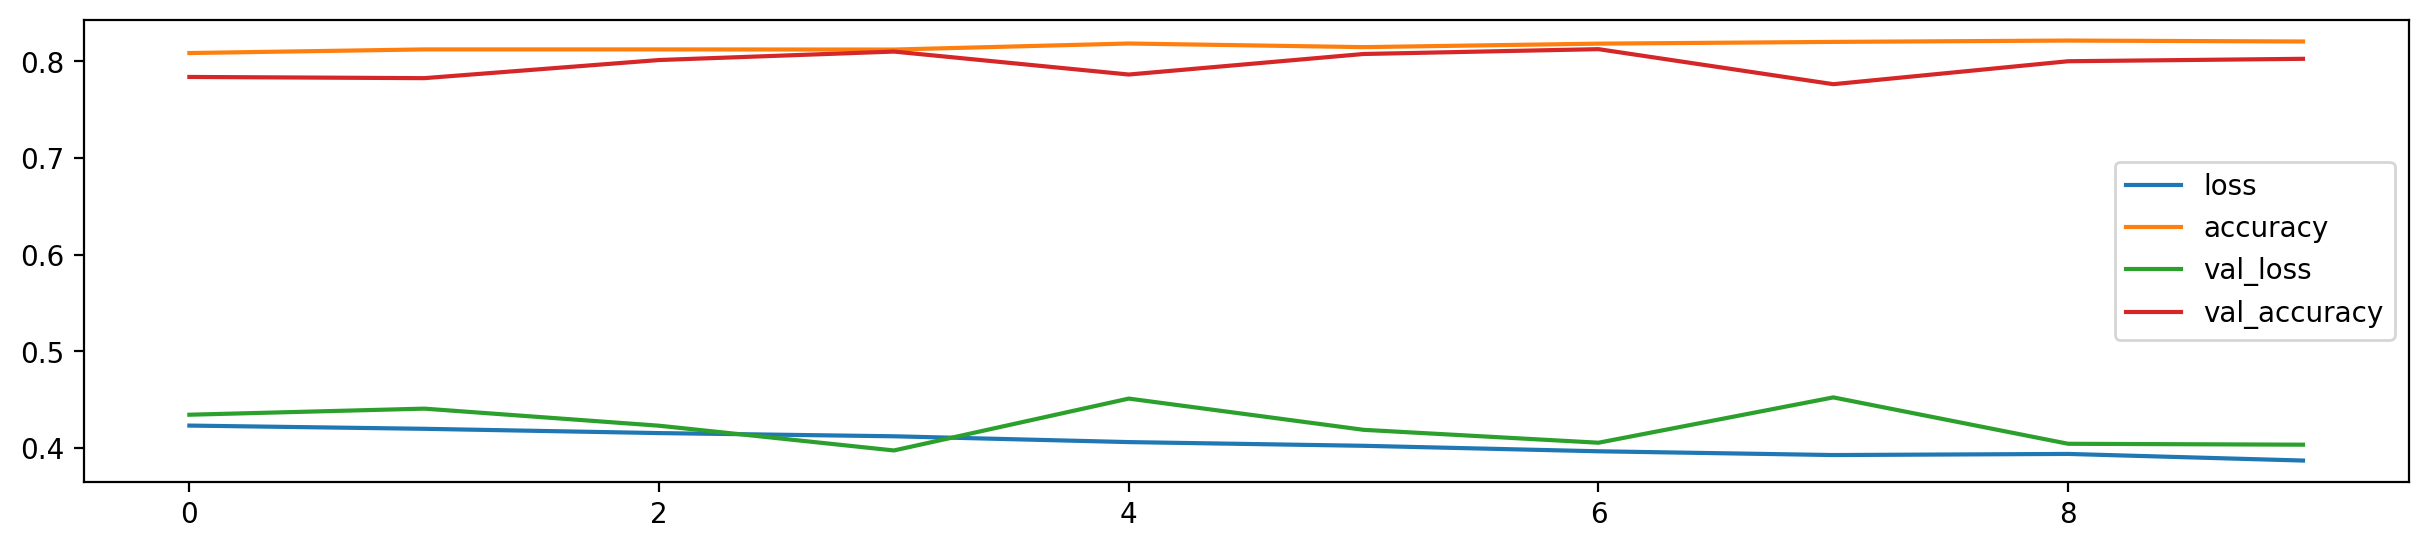

In [76]:
hist.plot()

# Model Evaluation on test data

In [80]:
from sklearn.metrics import classification_report

y_pred = model.predict(x_test)
print(y_pred)

63/63 [==============================] - 0s 2ms/step
[[0.05063326]
 [0.18962944]
 [0.10527329]
 ...
 [0.82532495]
 [0.04036078]
 [0.34292465]]


In [84]:
# print((model.predict(x_test)>0.5).astype(int))

In [82]:
y_pred = (y_pred > 0.5).astype(int)

In [83]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.92      0.81      0.86      1593
           1       0.50      0.74      0.59       407

    accuracy                           0.80      2000
   macro avg       0.71      0.77      0.73      2000
weighted avg       0.84      0.80      0.81      2000



# Model save and Load

In [90]:
import pickle
import os

In [86]:
# create a directory to save the model for future prediction
os.makedirs('model', exist_ok=True)

In [88]:
model.save('model/customer_churn_model.h5')

C:\Users\DOREEN DOMPREH\anaconda3\lib\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [91]:
# save scaler for test data to completely save model for future
pickle.dump(scaler, open('model/scaler.pkl', 'wb'))

In [92]:
# load pickle for test data to completely load model in future
# assume we create model1 from saved model, and we want to load it

model1 = keras.models.load_model('model/customer_churn_model.h5')

In [95]:
scaler1 = pickle.load(open('model/scaler.pkl', 'rb'))

# How to make real life prediction with model

In [108]:
# Adjust optimization parameters or models
x_test[0] 
# under the influence of scaler transformation
print(x_test[0])

x_encoded.columns
print(x_encoded.columns)

[-0.68073539 -0.27993196  0.68472287 -1.22605803  0.80883036  0.64104192
 -1.030206   -0.09501439 -0.57831252 -0.57773517  0.90750738]
Index(['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Geography_Germany',
       'Geography_Spain', 'Gender_Male'],
      dtype='object')


In [100]:
x_encoded.iloc[0]

CreditScore             619
Age                      42
Tenure                    2
Balance                   0
NumOfProducts             1
HasCrCard                 1
IsActiveMember            1
EstimatedSalary      101348
Geography_Germany         0
Geography_Spain           0
Gender_Male               0
Name: 0, dtype: int32

In [103]:
test = list(x_encoded.iloc[0].values)
test

[619, 42, 2, 0, 1, 1, 1, 101348, 0, 0, 0]

In [110]:
# actual data from x_encoded
# based on observations, we change the parameters to see if it predictive regardless of the changes we make in the model/parameter
test = [619, 42, 2, 0, 1, 1, 1, 101348, 0, 0, 0]

### We adjust the parameters based on observation to try the effectiveness of the model
1. Customers with estimated salary less than 5000 is likely to exit
2. Customers with 0 balance is likely to stay
3. Customers who have been with the bank for more than years is highly likely not to exit
4. Customers between ages 40-60 is likely to exit
5. Customers with less creditscore (300-400) is likely to exit

In [162]:
# make creditscore less, make gender male, change age
test = [[700, 99, 2, 0, 1, 1, 1, 101348, 0, 0, 0]]

In [163]:
test = scaler.transform(test)

C:\Users\DOREEN DOMPREH\anaconda3\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [164]:
(model.predict(test))

1/1 [==============================] - 0s 25ms/step


array([[0.00011198]], dtype=float32)

In [165]:
(model.predict(test)>0.5).astype(int)

1/1 [==============================] - 0s 25ms/step


array([[0]])

In [166]:
# wow, this is so awesome. You're goof girlll...